# 202001549 장희권

In [23]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from konlpy.tag import Okt
from PIL import Image
from collections import Counter
import pandas as pd
import numpy as np
import urllib
import time

In [10]:
tmp_list = []

for i in tqdm(range(1, 10)):
    url = "https://kin.naver.com/search/list.naver?query=%EB%B9%BC%EB%B9%BC%EB%A1%9C+%EB%8D%B0%EC%9D%B4&page="+str(i)
    html = urlopen(url)

    soup = BeautifulSoup(html, "html.parser")

    docs = soup.find("ul", {"class": "basic1"}).find_all("li")

    for doc in docs:
        ans = doc.find_all("dd")[1]
        tmp_list.append(ans.text.strip())

    time.sleep(0.5)

  0%|          | 0/9 [00:00<?, ?it/s]

In [11]:
okt = Okt()

ko_doc = '\n'.join(tmp_list)
ko_doc_noun = okt.nouns(ko_doc)

In [12]:
count_noun = Counter(ko_doc_noun)
count_noun.most_common(20)

[('빼빼로데이', 120),
 ('빼빼로', 97),
 ('선물', 74),
 ('데이', 36),
 ('여자친구', 27),
 ('추천', 26),
 ('친구', 23),
 ('때', 18),
 ('제', 16),
 ('저', 15),
 ('거', 11),
 ('남자친구', 11),
 ('이번', 11),
 ('내일', 10),
 ('직접', 10),
 ('요', 10),
 ('날', 10),
 ('좀', 10),
 ('남자', 9),
 ('준비', 8)]

In [25]:
stopword_list = ['빼빼로데이', '빼빼로', '데이']

for stopword in stopword_list:
    count_noun.pop(stopword)

In [26]:
img_mask = np.array(Image.open('present.jpg'))

wc_img = WordCloud(background_color="white", max_words=2000, font_path=r'C:\Windows\Fonts\나눔고딕.ttf', mask=img_mask)
wc_img = wc_img.generate_from_frequencies(count_noun)

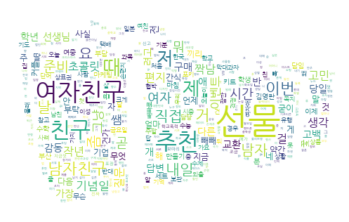

In [27]:
plt.imshow(wc_img, interpolation="bilinear")
plt.axis('off')
plt.show()

# 202001549 장희권